In [1]:
!apt-get install unrar
!unrar x /content/car.rar /content/extract/
!ls /content/extract/

Streaming output truncated to the last 5000 lines.
Extracting  /content/extract/train/labels/00000_00004_00000_png.rf.45dccdbf08ed12f25d7742d8bf88c102.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00001_png.rf.557d3494b3e633e29069a6f42918334e.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00002_png.rf.3e3e95e1ba16cac885d3de7864a40fb4.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00003_png.rf.9c6ba4d0186eec82a26bddc9a1204efb.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00003_png.rf.a8220aafd1a7f7bba4391bd0a10cdd2f.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00004_png.rf.d4f5ee50324659a47ec7ae664f8ce3a6.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00005_png.rf.55e0ec09c7c892e631d9197011a8ad27.txt      83%  OK 
Extracting  /content/extract/train/labels/00000_00004_00006_

In [2]:
# Install Essential Libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 23.3 MB/s eta 0:00:00


In [3]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

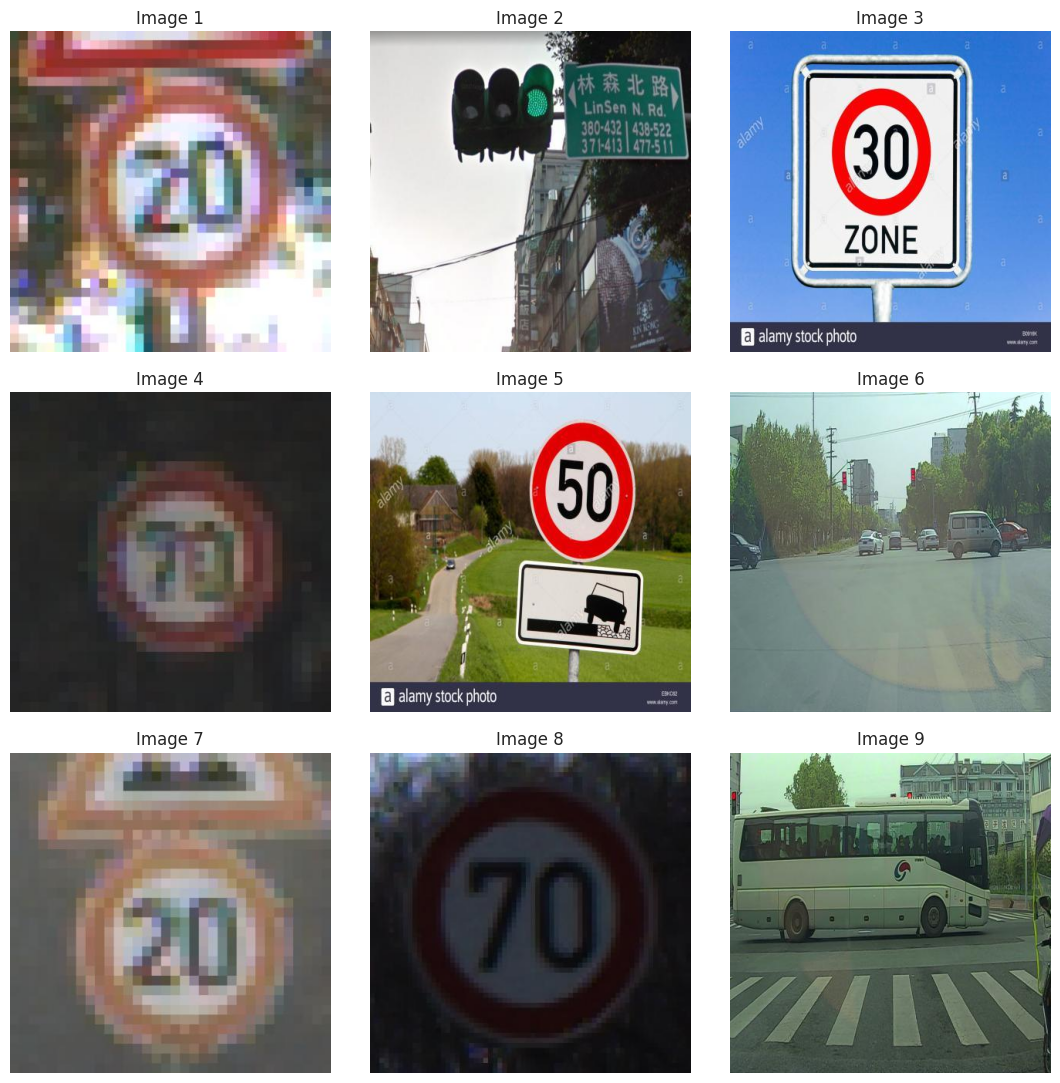

In [5]:
Image_dir = '/content/extract/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Get the size of the image
image = cv2.imread("/content/extract/train/images/00000_00000_00002_png.rf.c8ad86390583e313b909403180f01ffd.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 106MB/s]



image 1/1 /content/extract/train/images/00000_00001_00017_png.rf.37da7e35d170d5aa6878f332a40dfd5d.jpg: 640x640 1 person, 13.1ms
Speed: 14.0ms preprocess, 13.1ms inference, 1103.2ms postprocess per image at shape (1, 3, 640, 640)


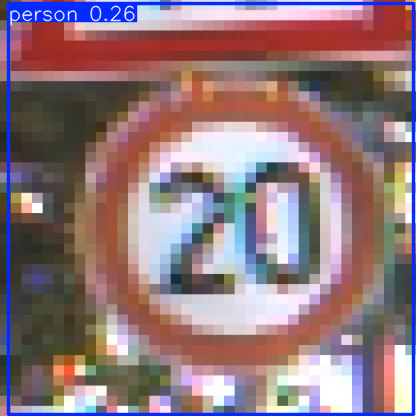

In [8]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/extract/train/images/00000_00001_00017_png.rf.37da7e35d170d5aa6878f332a40dfd5d.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 11.9 MB/s eta 0:00:00


In [11]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/extract/data.yaml",epochs = 20, batch = -1, optimizer = 'auto')


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/extract/data.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.5MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.11G reserved, 0.07G allocated, 14.57G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.201         62.73         315.4        (1, 3, 640, 640)                    list
     3013773       16.42         0.308         22.89         50.16        (2, 3, 640, 640)                    list
     3013773       32.84         0.547          24.5         48.76        (4, 3, 640, 640)                    list
     3013773       65.67         0.988         30.35         50.93        (8, 3, 640, 640)                    list
     3013773       131.3         1.917         54.89         69.06       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 75 for CUDA:0 8.84G/14.75G (60%) ✅


train: Scanning /content/extract/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 1914.68it/s]


train: New cache created: /content/extract/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/extract/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 1040.82it/s]


val: New cache created: /content/extract/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005859375), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      9.74G     0.8935       3.84      1.229         11        640: 100%|██████████| 48/48 [01:08<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all        801        944     0.0426      0.768     0.0966     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      9.67G     0.7414      2.736      1.089          9        640: 100%|██████████| 48/48 [01:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.87s/it]

                   all        801        944      0.242      0.415      0.241      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.66G     0.7241      2.318      1.076          6        640: 100%|██████████| 48/48 [01:04<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]

                   all        801        944      0.326      0.579      0.399      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.68G      0.721      1.994      1.067          7        640: 100%|██████████| 48/48 [01:06<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

                   all        801        944      0.537      0.569      0.587      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.68G     0.6807      1.646       1.04         11        640: 100%|██████████| 48/48 [01:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        801        944      0.664      0.652        0.7      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.78G     0.6669      1.436      1.029         12        640: 100%|██████████| 48/48 [01:07<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]

                   all        801        944      0.711      0.614      0.704      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       9.7G     0.6644      1.309      1.029         11        640: 100%|██████████| 48/48 [01:02<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.85s/it]

                   all        801        944      0.752      0.736      0.802      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      9.66G     0.6434      1.177      1.017         13        640: 100%|██████████| 48/48 [01:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.68s/it]

                   all        801        944      0.825      0.769      0.844      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.69G     0.6207       1.13      1.005         16        640: 100%|██████████| 48/48 [01:04<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.42s/it]

                   all        801        944      0.836      0.807      0.871      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      9.66G      0.603          1     0.9926          9        640: 100%|██████████| 48/48 [01:07<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.03s/it]

                   all        801        944      0.903      0.782      0.887      0.756


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      9.61G     0.6178     0.8985     0.9965          5        640: 100%|██████████| 48/48 [01:07<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]

                   all        801        944       0.91      0.788      0.888       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      9.61G     0.5845      0.789     0.9586          5        640: 100%|██████████| 48/48 [01:02<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.36s/it]

                   all        801        944      0.926      0.812      0.907       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      9.61G     0.5725     0.7123     0.9578          5        640: 100%|██████████| 48/48 [01:01<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        801        944      0.911      0.866      0.925       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      9.66G     0.5678     0.6829     0.9429          6        640: 100%|██████████| 48/48 [01:02<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

                   all        801        944      0.936       0.83      0.923      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.61G     0.5613     0.6401     0.9401          7        640: 100%|██████████| 48/48 [01:02<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.44s/it]

                   all        801        944      0.923      0.854      0.932      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      9.61G     0.5485     0.6029     0.9365          5        640: 100%|██████████| 48/48 [01:02<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]

                   all        801        944      0.913       0.87      0.932      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      9.61G     0.5385     0.5631     0.9206          6        640: 100%|██████████| 48/48 [01:02<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]

                   all        801        944      0.918       0.86      0.935      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.61G     0.5235     0.5298     0.9251          5        640: 100%|██████████| 48/48 [01:03<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

                   all        801        944       0.94      0.865      0.945      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      9.61G     0.5233     0.5154      0.916          5        640: 100%|██████████| 48/48 [01:03<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]

                   all        801        944      0.957      0.863      0.949      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.61G     0.5089     0.4895       0.91          7        640: 100%|██████████| 48/48 [01:02<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]

                   all        801        944      0.943      0.885      0.953      0.821



20 epochs completed in 0.415 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:15<00:00,  2.51s/it]


                   all        801        944      0.942      0.885      0.953      0.821
           Green Light         87        122      0.894      0.694      0.831      0.497
             Red Light         74        108      0.883      0.702      0.814      0.483
       Speed Limit 100         52         52      0.883      0.942      0.983      0.892
       Speed Limit 110         17         17      0.887      0.882      0.954      0.874
       Speed Limit 120         60         60      0.999      0.917      0.992      0.927
        Speed Limit 20         56         56      0.979      0.982      0.986      0.853
        Speed Limit 30         71         74      0.957      0.946      0.982      0.922
        Speed Limit 40         53         55      0.873      0.945      0.984      0.874
        Speed Limit 50         68         71      0.978      0.817      0.949       0.85
        Speed Limit 60         76         76      0.933      0.909      0.959      0.872
        Speed Limit 7

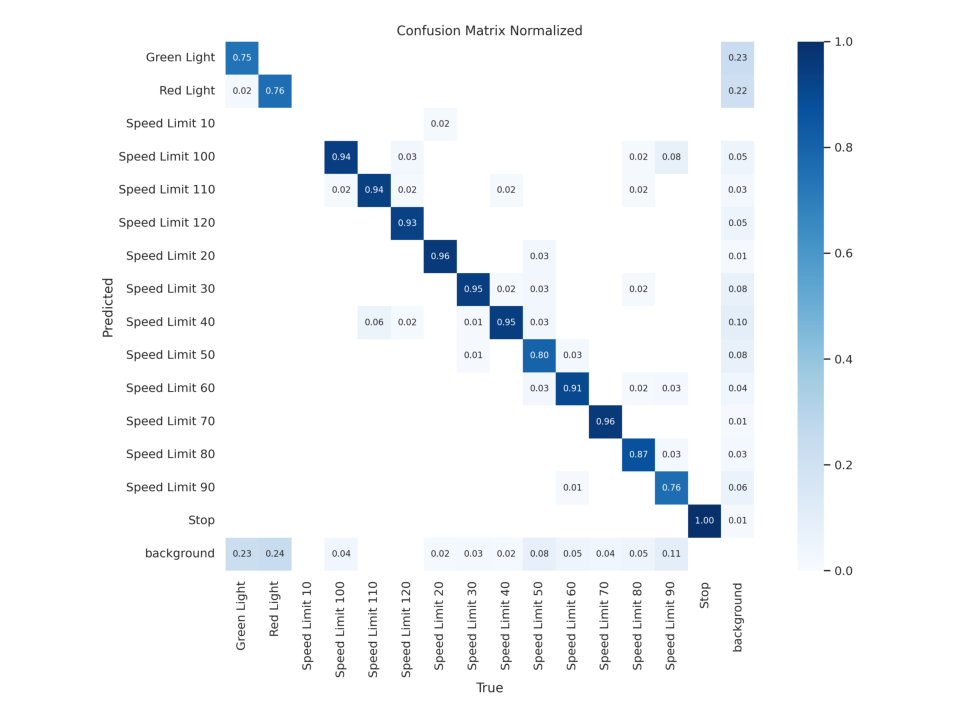

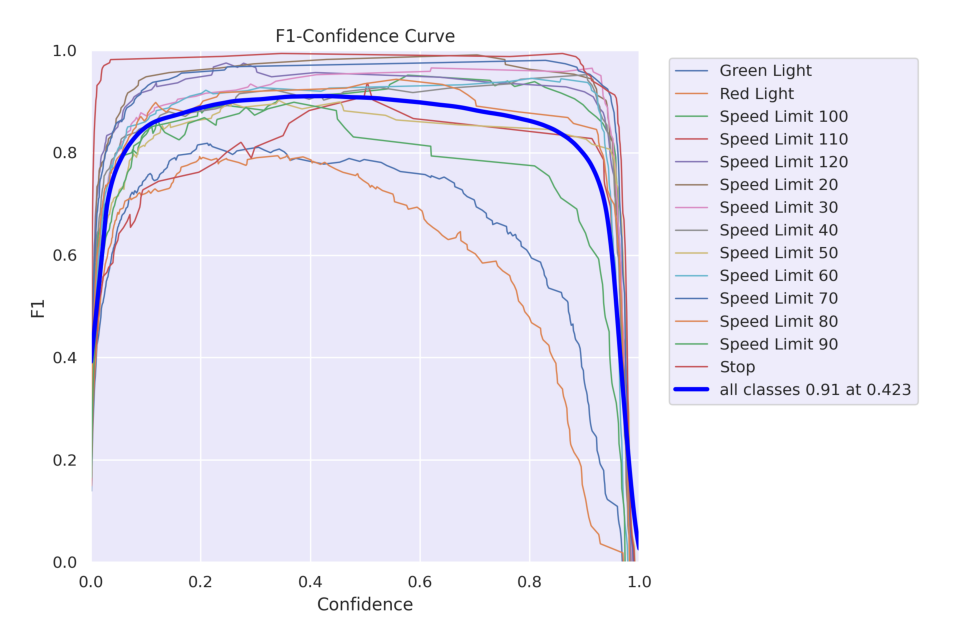

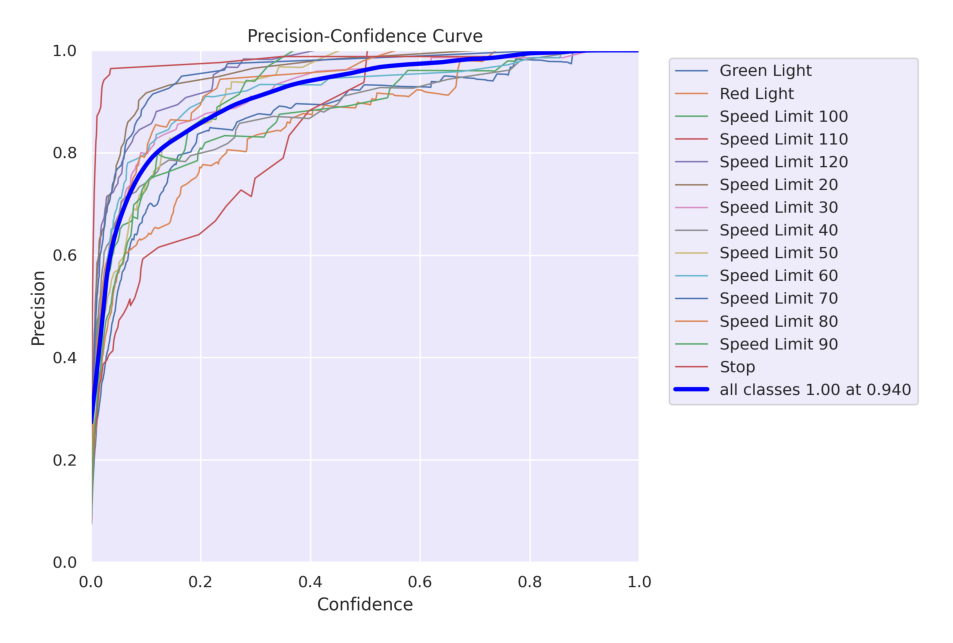

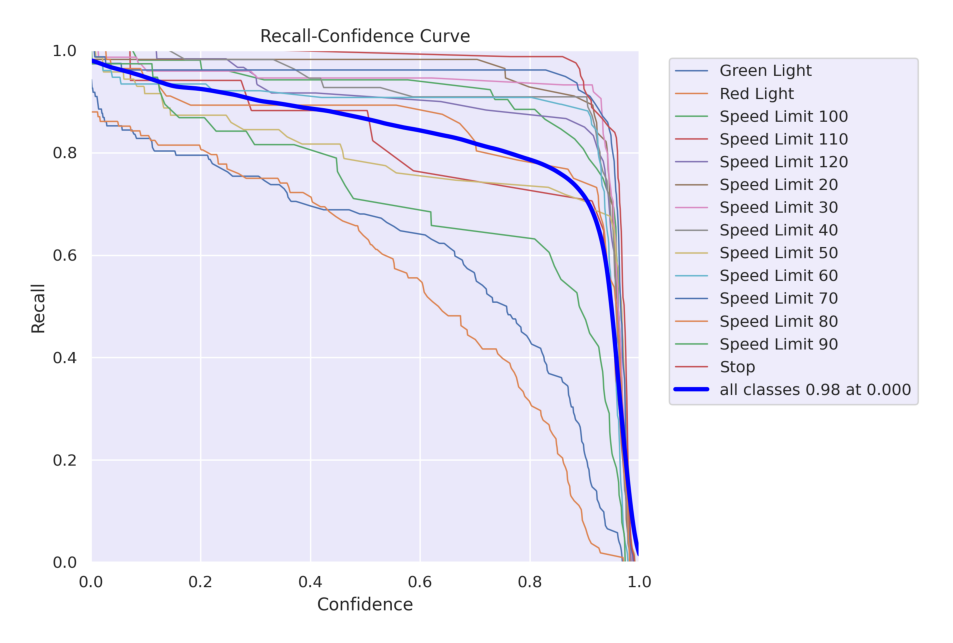

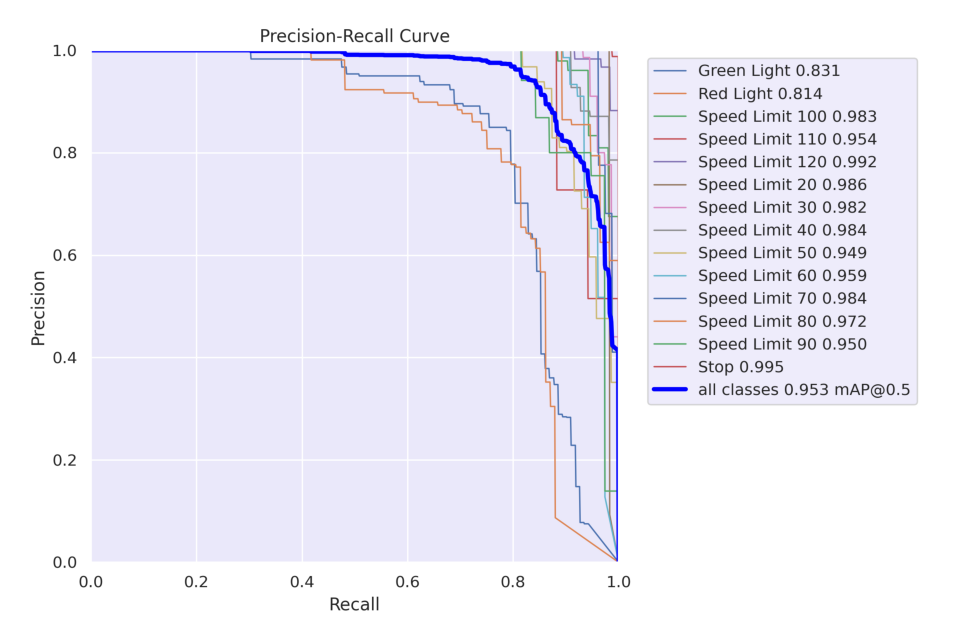

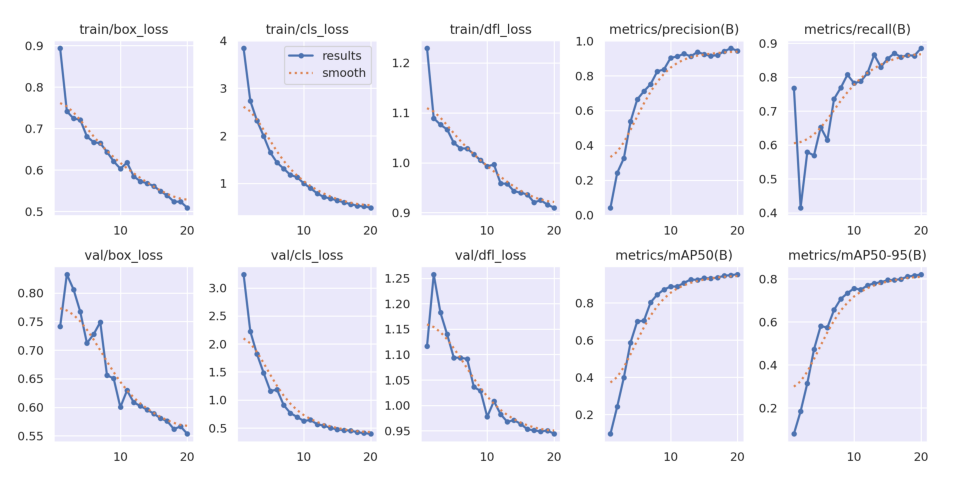

In [12]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train2'

# Display the images
display_images(post_training_files_path, image_files)


In [13]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/extract/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.31it/s]


                   all        801        944      0.943      0.885      0.953      0.823
           Green Light         87        122      0.894      0.693      0.831      0.493
             Red Light         74        108      0.883      0.701      0.814      0.487
       Speed Limit 100         52         52      0.883      0.942      0.983      0.891
       Speed Limit 110         17         17      0.889      0.882      0.955      0.888
       Speed Limit 120         60         60      0.999      0.917      0.992      0.926
        Speed Limit 20         56         56      0.979      0.982      0.986      0.851
        Speed Limit 30         71         74      0.958      0.946      0.982      0.924
        Speed Limit 40         53         55      0.875      0.945      0.984      0.872
        Speed Limit 50         68         71      0.979      0.817      0.949      0.849
        Speed Limit 60         76         76      0.933       0.91      0.959      0.876
        Speed Limit 7


0: 640x640 1 Speed Limit 80, 14.2ms
Speed: 2.8ms preprocess, 14.2ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 11.4ms
Speed: 2.9ms preprocess, 11.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 20, 13.3ms
Speed: 2.9ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 13.5ms
Speed: 2.3ms preprocess, 13.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 17.3ms
Speed: 2.3ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 90, 21.3ms
Speed: 9.5ms preprocess, 21.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 20, 13.9ms
Speed: 4.1ms preprocess, 13.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 19.9ms
Speed: 2.6ms preprocess, 19.9ms infe

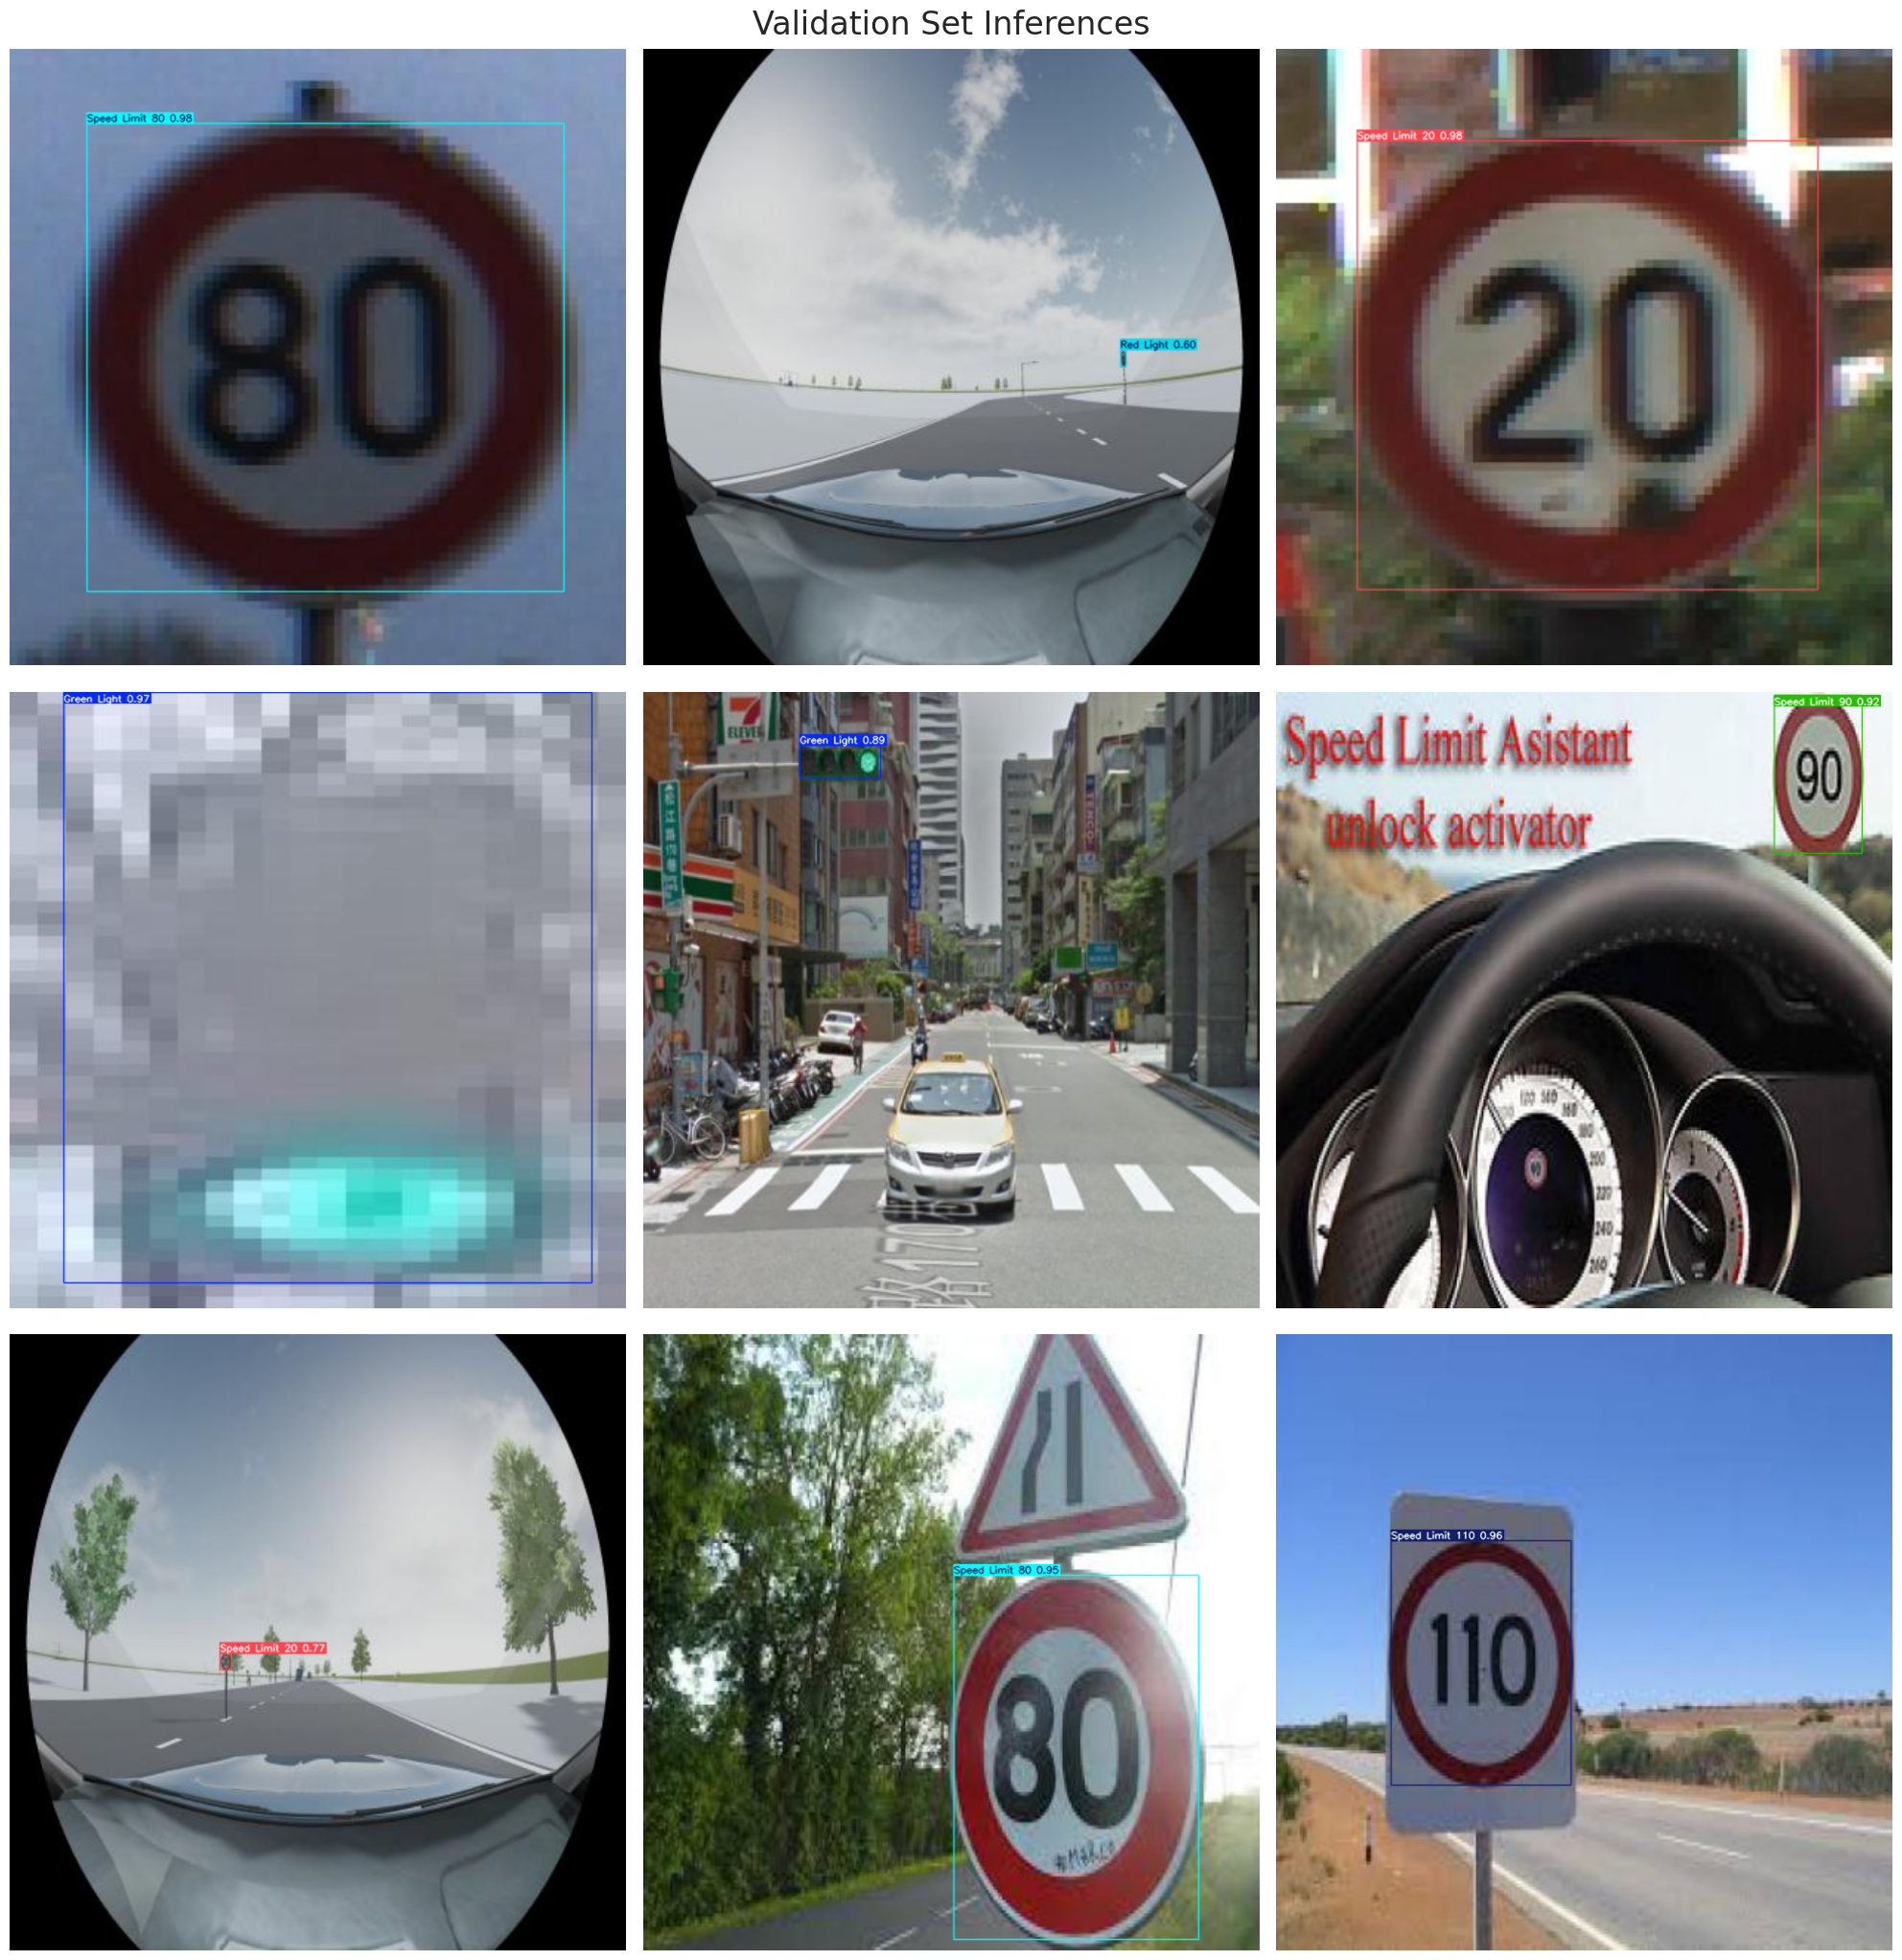

In [14]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/extract'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
